In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from mmq import metodo_minimos_quadrados


In [149]:
df_tabela_ligantes = pd.read_excel(
    os.path.join("data","df_tabela_ligantes.xlsx")
)

df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes
0,1,00:00:00,00:15:00,601
1,2,00:15:00,00:30:00,190
2,3,00:30:00,00:45:00,180
3,4,00:45:00,01:00:00,177
4,5,01:00:00,01:15:00,162
...,...,...,...,...
91,92,22:45:00,23:00:00,920
92,93,23:00:00,23:15:00,897
93,94,23:15:00,23:30:00,571
94,95,23:30:00,23:45:00,560


In [150]:
os.path.join("data","df_tabela_ligantes.xlsx")

'data/df_tabela_ligantes.xlsx'

In [151]:
df_duracoes = pd.read_excel(
    os.path.join("data","df_duracoes.xlsx")
)

df_duracoes

,duracao_conexao,numero_ligantes,percentagem_relativa,percentagem_acumulada
0,0,0,0.000,0.000
1,5,870,0.087,0.087
2,10,2210,0.221,0.308
3,15,2940,0.294,0.602
4,20,1710,0.171,0.773
5,25,1360,0.136,0.909
6,30,590,0.059,0.968
7,35,250,0.025,0.993
8,40,70,0.007,1.000


<Axes: xlabel='duracao_conexao'>

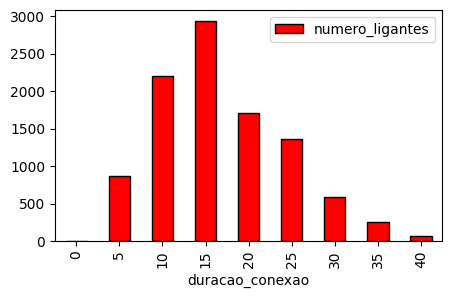

In [152]:
df_duracoes.plot(x="duracao_conexao",
                 y="numero_ligantes",
                 kind="bar",
                 figsize=(5,3),
                 color="red",
                 edgecolor="black"
                 )

<Axes: xlabel='percentagem_acumulada', ylabel='duracao_conexao'>

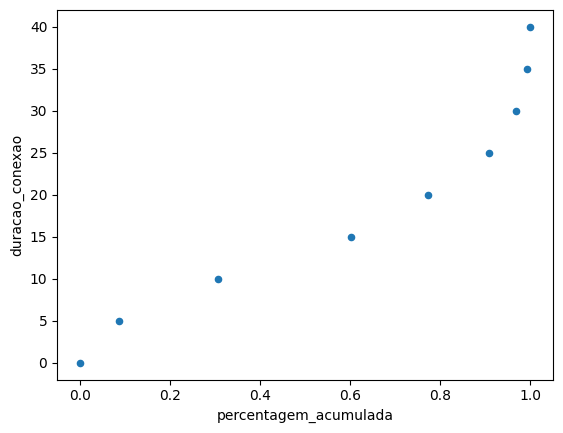

In [153]:
df_duracoes.plot(x="percentagem_acumulada",
                 y="duracao_conexao",
                 kind="scatter",
                 )

In [154]:
coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    5
)

coefs

array([  7.25285079e+02,  -1.67791097e+03,   1.41326154e+03,
        -5.23808658e+02,   1.01010563e+02,  -2.06253859e-01])

In [155]:
x = np.linspace(0,1,1000)
y = np.polyval(coefs, x)
print(x[::100].round(1))
print(y[::100].round(1))


[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
[ -0.2   5.9   7.9   9.3  11.3  13.8  16.   17.6  19.4  24.2]


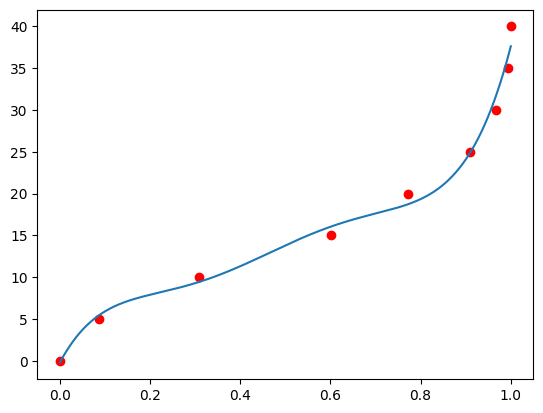

In [156]:
percentagens_acumuladas = df_duracoes["percentagem_acumulada"]
duracoes = df_duracoes["duracao_conexao"]

plt.scatter(percentagens_acumuladas, duracoes,
            color="red", label="Dados Originais"
            )
plt.plot(x, y, label="Polinomio")
plt.show()

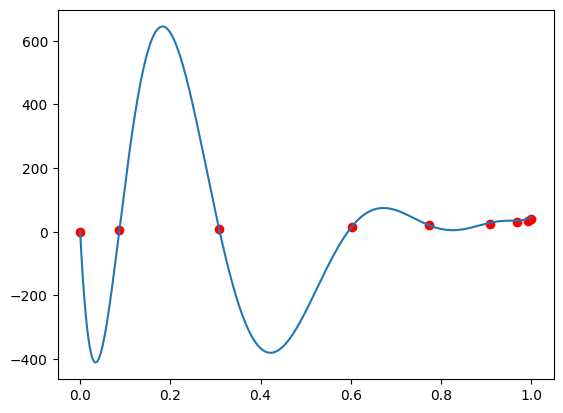

In [157]:
coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    8
)

x = np.linspace(0,1,1000)
y = np.polyval(coefs, x)

percentagens_acumuladas = df_duracoes["percentagem_acumulada"]
duracoes = df_duracoes["duracao_conexao"]

plt.scatter(percentagens_acumuladas, duracoes,
            color="red", label="Dados Originais"
            )
plt.plot(x, y, label="Polinomio")
plt.show()

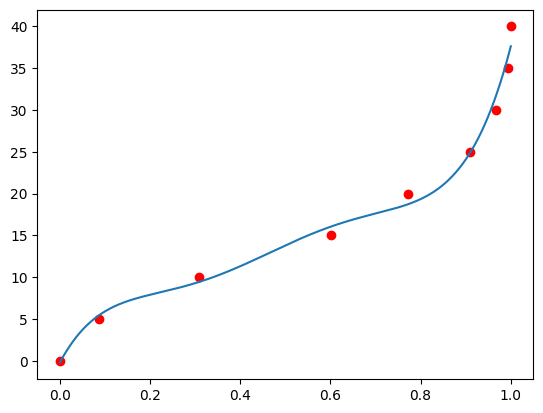

In [158]:
coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    5
)

x = np.linspace(0,1,1000)
y = np.polyval(coefs, x)

percentagens_acumuladas = df_duracoes["percentagem_acumulada"]
duracoes = df_duracoes["duracao_conexao"]

plt.scatter(percentagens_acumuladas, duracoes,
            color="red", label="Dados Originais"
            )
plt.plot(x, y, label="Polinomio")
plt.show()

In [159]:
np.polyval(coefs,0)

-0.20625385892981285

In [160]:
np.polyval(coefs, [0, 0.1, 0.2, 0.3])

array([-0.20625386,  5.90943916,  7.89703842,  9.28356129])

In [161]:
tempos_aleatorios = []

for _ in range(10_000):
    alpha = np.random.random()
    tempo = np.polyval(coefs, alpha)
    tempos_aleatorios.append(tempo)

np.mean(tempos_aleatorios)


14.477657376789212

In [162]:
df_tabela_ligantes.loc[0]

rotulo                          1
hora_inicio              00:00:00
hora_fim                 00:15:00
numero_medio_ligantes         601
Name: 0, dtype: object

In [163]:
qtd_ligacoes = (
    df_tabela_ligantes.loc[0, "numero_medio_ligantes"]
)
qtd_ligacoes

601

In [164]:
np.random.seed(0)
momentos_ligacoes = np.random.randint(0,900,size=qtd_ligacoes)
momentos_ligacoes[:10]

array([684, 559, 629, 192, 835, 763, 707, 359,   9, 723])

In [165]:
df_duracoes.loc[0,"duracao_conexao"]

0

In [166]:
df_duracoes.iloc[0,0]

0

In [167]:
momentos_ligacoes[:10]

array([684, 559, 629, 192, 835, 763, 707, 359,   9, 723])

In [168]:
momentos_ligacoes.sort()
momentos_ligacoes[:10]

array([ 0,  3,  4,  4,  7,  9, 11, 11, 13, 13])

In [169]:
atendentes: list[dict] = []

In [170]:
np.set_printoptions(legacy="1.13")

In [171]:
momento_ligacao = momentos_ligacoes[0]
momento_ligacao

0

In [172]:
np.random.seed(0)
aleatorio = np.random.rand()
tempo_duracao = abs(np.polyval(coefs, aleatorio))
print(tempo_duracao)

14.9651548679


In [173]:
if atendentes == []:
    atendente = {
        "inicio": momento_ligacao,
        "fim": momento_ligacao + tempo_duracao
    }
    atendentes.append(atendente)

atendentes

[{'inicio': 0, 'fim': 14.965154867903406}]

In [174]:
momento_ligacao = momentos_ligacoes[1]
momento_ligacao

3

In [175]:
espera_maxima = 10
tempo_descanso = 0

In [176]:
np.random.seed(1)
aleatorio = np.random.random()
tempo_duracao = np.polyval(coefs, aleatorio)
tempo_duracao

11.718611909630425

In [177]:


for atendente in atendentes:
    fim = atendente["fim"] + tempo_descanso

    if momento_ligacao + espera_maxima < fim:
        ocupado = True
    else:
        ocupado = False
    
    if not ocupado:
        if momento_ligacao + espera_maxima > fim:
            atendente["inicio"] = momento_ligacao + espera_maxima
        else:
            atendente["inicio"] = fim
        
        atendente["fim"] = atendente["inicio"] + tempo_duracao
        break

else:
    atendente = {
        "inicio": momento_ligacao,
        "fim": momento_ligacao + tempo_duracao
    }

    atendentes.append(atendente)
atendentes



[{'inicio': 0, 'fim': 14.965154867903406},
 {'inicio': 3, 'fim': 14.718611909630425}]

In [178]:
momento_ligacao = momentos_ligacoes[2]
momento_ligacao

4

In [179]:
for momento_ligacao in momentos_ligacoes:
    print(momento_ligacao)
    


0
3
4
4
7
9
11
11
13
13
16
19
23
24
24
25
26
28
29
29
32
32
33
36
36
41
41
42
43
43
44
47
53
53
56
57
58
59
61
63
67
69
70
72
72
73
74
80
80
82
83
84
86
87
87
87
88
89
91
91
93
93
94
94
95
98
99
102
106
106
107
110
111
112
114
115
117
119
120
121
123
126
128
128
128
128
129
129
130
131
134
135
136
136
136
137
138
139
139
143
146
147
147
148
148
148
149
149
151
152
152
153
160
163
164
166
168
169
174
174
174
174
176
177
180
180
182
183
184
189
191
192
195
197
197
197
199
201
201
201
201
203
207
207
209
209
209
209
212
213
216
217
219
221
223
225
226
226
226
227
227
228
228
232
234
237
244
246
248
248
254
256
256
256
257
259
260
265
265
269
273
273
274
274
274
275
276
277
280
280
281
282
284
284
286
287
288
289
290
290
291
291
291
292
292
296
297
300
305
305
307
307
307
314
314
321
322
323
323
323
324
324
324
326
326
327
328
329
335
336
339
340
341
341
343
347
347
348
349
353
355
357
357
359
360
360
365
368
368
369
369
370
371
371
373
373
376
376
377
381
383
383
387
388
392
393
394
396
3

In [180]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
atendentes = []
for momento_ligacao in momentos_ligacoes:
    aleatorio = np.random.random()
    tempo_duracao = abs(np.polyval(coefs, aleatorio))

    for atendente in atendentes:
        fim = atendente["fim"] + tempo_descanso

        if momento_ligacao + espera_maxima < fim:
            ocupado = True
        else:
            ocupado = False

        if not ocupado:

            if momento_ligacao + espera_maxima > fim:
                atendente["inicio"] = momento_ligacao + espera_maxima
            else:
                atendente["inicio"] = fim
            
            atendente["fim"] = atendente["inicio"] + tempo_duracao
            break
    else:

        atendente = {
            "inicio": momento_ligacao,
            "fim": momento_ligacao + tempo_duracao
        }
        atendentes.append(atendente)

atendentes

[{'inicio': 904, 'fim': 914.40375649847249},
 {'inicio': 906, 'fim': 917.86945228384025},
 {'inicio': 909, 'fim': 917.37356632857836},
 {'inicio': 900, 'fim': 912.04701461191576},
 {'inicio': 906, 'fim': 913.54143974617239},
 {'inicio': 906, 'fim': 909.21101754464075},
 {'inicio': 907, 'fim': 923.65667308194645},
 {'inicio': 898, 'fim': 910.80468815162635},
 {'inicio': 892, 'fim': 918.91345867417851},
 {'inicio': 892, 'fim': 899.69624954296353},
 {'inicio': 895, 'fim': 921.10612199365335},
 {'inicio': 894, 'fim': 924.69074239257839},
 {'inicio': 894, 'fim': 912.97138604502402},
 {'inicio': 895, 'fim': 911.50408245719996},
 {'inicio': 896, 'fim': 906.24103253252702},
 {'inicio': 896, 'fim': 913.60372669710557},
 {'inicio': 899, 'fim': 917.10414350536405},
 {'inicio': 899, 'fim': 928.75678690019186},
 {'inicio': 899, 'fim': 903.08006092131518},
 {'inicio': 899, 'fim': 906.40232584576802}]

In [181]:
len(atendentes)

20

In [182]:
np.random.permutation([1,2,3,4,5,6,7,8])

array([2, 1, 5, 4, 8, 6, 3, 7])

In [183]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
atendentes = []
for momento_ligacao in momentos_ligacoes:
    aleatorio = np.random.random()
    tempo_duracao = abs(np.polyval(coefs, aleatorio))

    atendentes = list(np.random.permutation(atendentes))

    for atendente in atendentes:
        fim = atendente["fim"] + tempo_descanso

        if momento_ligacao + espera_maxima < fim:
            ocupado = True
        else:
            ocupado = False

        if not ocupado:

            if momento_ligacao + espera_maxima > fim:
                atendente["inicio"] = momento_ligacao + espera_maxima
            else:
                atendente["inicio"] = fim
            
            atendente["fim"] = atendente["inicio"] + tempo_duracao
            break
    else:

        atendente = {
            "inicio": momento_ligacao,
            "fim": momento_ligacao + tempo_duracao
        }
        atendentes.append(atendente)

atendentes

[{'inicio': 899, 'fim': 909.29559843831044},
 {'inicio': 900, 'fim': 910.89334430872168},
 {'inicio': 899, 'fim': 932.21236755480425},
 {'inicio': 909, 'fim': 917.53861755800608},
 {'inicio': 904, 'fim': 920.23396461812547},
 {'inicio': 899, 'fim': 908.85265704318226},
 {'inicio': 867, 'fim': 894.99620687617789},
 {'inicio': 901, 'fim': 917.66657940139623},
 {'inicio': 907, 'fim': 915.17518229707707},
 {'inicio': 906, 'fim': 913.65133331278503},
 {'inicio': 896, 'fim': 906.82228408251751},
 {'inicio': 892, 'fim': 907.66966275734342},
 {'inicio': 882, 'fim': 901.1383790525291},
 {'inicio': 883, 'fim': 902.83508525988896},
 {'inicio': 814, 'fim': 843.61932082318299},
 {'inicio': 899, 'fim': 907.73089614698642},
 {'inicio': 896, 'fim': 912.80887286588984},
 {'inicio': 906, 'fim': 930.77650856574269},
 {'inicio': 906, 'fim': 914.0496784224564}]

In [184]:
len(atendentes)

19

In [185]:
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes
0,1,00:00:00,00:15:00,601
1,2,00:15:00,00:30:00,190
2,3,00:30:00,00:45:00,180
3,4,00:45:00,01:00:00,177
4,5,01:00:00,01:15:00,162
...,...,...,...,...
91,92,22:45:00,23:00:00,920
92,93,23:00:00,23:15:00,897
93,94,23:15:00,23:30:00,571
94,95,23:30:00,23:45:00,560


In [186]:
#tempo_descanso.seed(5)


In [187]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
coluna_nan = []
for i, linha in df_tabela_ligantes.iterrows():
    qtd_ligacoes = linha["numero_medio_ligantes"]

    momentos_ligacoes = np.random.randint(0, 900, size=qtd_ligacoes)
    momentos_ligacoes.sort()

    atendentes = []
    for momento_ligacao in momentos_ligacoes:
        aleatorio = np.random.random()
        tempo_duracao = abs(np.polyval(coefs, aleatorio))

        atendentes = list(np.random.permutation(atendentes))

        for atendente in atendentes:
            fim = atendente["fim"] + tempo_descanso

            if momento_ligacao + espera_maxima < fim:
                ocupado = True
            else:
                ocupado = False

            if not ocupado:

                if momento_ligacao + espera_maxima > fim:
                    atendente["inicio"] = momento_ligacao + espera_maxima
                else:
                    atendente["inicio"] = fim
                
                atendente["fim"] = atendente["inicio"] + tempo_duracao
                break
        else:

            atendente = {
                "inicio": momento_ligacao,
                "fim": momento_ligacao + tempo_duracao
            }
            atendentes.append(atendente)
    
    nan = len(atendentes)
    coluna_nan.append(nan)

coluna_nan

[20,
 9,
 8,
 9,
 8,
 5,
 6,
 7,
 5,
 5,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 3,
 4,
 6,
 6,
 8,
 7,
 20,
 21,
 23,
 23,
 41,
 41,
 41,
 45,
 66,
 59,
 60,
 67,
 70,
 75,
 71,
 75,
 66,
 64,
 62,
 68,
 57,
 57,
 56,
 60,
 64,
 67,
 63,
 70,
 69,
 67,
 64,
 66,
 71,
 66,
 70,
 67,
 68,
 66,
 68,
 71,
 68,
 69,
 73,
 62,
 55,
 51,
 52,
 48,
 45,
 44,
 39,
 38,
 41,
 36,
 36,
 40,
 36,
 34,
 30,
 31,
 31,
 26,
 26,
 26,
 23,
 18,
 18,
 18]

In [188]:
df_tabela_ligantes["nan"] = coluna_nan
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes,nan
0,1,00:00:00,00:15:00,601,20
1,2,00:15:00,00:30:00,190,9
2,3,00:30:00,00:45:00,180,8
3,4,00:45:00,01:00:00,177,9
4,5,01:00:00,01:15:00,162,8
...,...,...,...,...,...
91,92,22:45:00,23:00:00,920,26
92,93,23:00:00,23:15:00,897,23
93,94,23:15:00,23:30:00,571,18
94,95,23:30:00,23:45:00,560,18


--- 
# Attentus



In [189]:
import pulp as plp

In [190]:
df_nan = df_tabela_ligantes.copy()
df_nan

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes,nan
0,1,00:00:00,00:15:00,601,20
1,2,00:15:00,00:30:00,190,9
2,3,00:30:00,00:45:00,180,8
3,4,00:45:00,01:00:00,177,9
4,5,01:00:00,01:15:00,162,8
...,...,...,...,...,...
91,92,22:45:00,23:00:00,920,26
92,93,23:00:00,23:15:00,897,23
93,94,23:15:00,23:30:00,571,18
94,95,23:30:00,23:45:00,560,18


In [191]:
df_nad = pd.read_excel(
    os.path.join("data", "nad.xlsx")
)
df_nad

,regime,enc
0,3,540
1,4,680
2,6,960


In [192]:
from itertools import product

In [193]:
regimes = (
    df_nad["regime"].to_dict()
)
regimes

{0: 3, 1: 4, 2: 6}

In [194]:
inicios = (
    df_nan["hora_inicio"].to_dict()
)
inicios

{0: datetime.time(0, 0),
 1: datetime.time(0, 15),
 2: datetime.time(0, 30),
 3: datetime.time(0, 45),
 4: datetime.time(1, 0),
 5: datetime.time(1, 15),
 6: datetime.time(1, 30),
 7: datetime.time(1, 45),
 8: datetime.time(2, 0),
 9: datetime.time(2, 15),
 10: datetime.time(2, 30),
 11: datetime.time(2, 45),
 12: datetime.time(3, 0),
 13: datetime.time(3, 15),
 14: datetime.time(3, 30),
 15: datetime.time(3, 45),
 16: datetime.time(4, 0),
 17: datetime.time(4, 15),
 18: datetime.time(4, 30),
 19: datetime.time(4, 45),
 20: datetime.time(5, 0),
 21: datetime.time(5, 15),
 22: datetime.time(5, 30),
 23: datetime.time(5, 45),
 24: datetime.time(6, 0),
 25: datetime.time(6, 15),
 26: datetime.time(6, 30),
 27: datetime.time(6, 45),
 28: datetime.time(7, 0),
 29: datetime.time(7, 15),
 30: datetime.time(7, 30),
 31: datetime.time(7, 45),
 32: datetime.time(8, 0),
 33: datetime.time(8, 15),
 34: datetime.time(8, 30),
 35: datetime.time(8, 45),
 36: datetime.time(9, 0),
 37: datetime.time(9,

In [195]:
lista_variaveis = list(product(regimes, inicios))
lista_variaveis

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 

In [196]:
prob = plp.LpProblem(
    name = "Attentus", sense = plp.LpMinimize
)
prob

Attentus:
MINIMIZE
None
VARIABLES

In [197]:
pulp_variaveis = plp.LpVariable.dicts(
    "A", 
    lista_variaveis, 
    lowBound=0,
    cat=plp.LpInteger 
)

pulp_variaveis

{(0, 0): A_(0,_0),
 (0, 1): A_(0,_1),
 (0, 2): A_(0,_2),
 (0, 3): A_(0,_3),
 (0, 4): A_(0,_4),
 (0, 5): A_(0,_5),
 (0, 6): A_(0,_6),
 (0, 7): A_(0,_7),
 (0, 8): A_(0,_8),
 (0, 9): A_(0,_9),
 (0, 10): A_(0,_10),
 (0, 11): A_(0,_11),
 (0, 12): A_(0,_12),
 (0, 13): A_(0,_13),
 (0, 14): A_(0,_14),
 (0, 15): A_(0,_15),
 (0, 16): A_(0,_16),
 (0, 17): A_(0,_17),
 (0, 18): A_(0,_18),
 (0, 19): A_(0,_19),
 (0, 20): A_(0,_20),
 (0, 21): A_(0,_21),
 (0, 22): A_(0,_22),
 (0, 23): A_(0,_23),
 (0, 24): A_(0,_24),
 (0, 25): A_(0,_25),
 (0, 26): A_(0,_26),
 (0, 27): A_(0,_27),
 (0, 28): A_(0,_28),
 (0, 29): A_(0,_29),
 (0, 30): A_(0,_30),
 (0, 31): A_(0,_31),
 (0, 32): A_(0,_32),
 (0, 33): A_(0,_33),
 (0, 34): A_(0,_34),
 (0, 35): A_(0,_35),
 (0, 36): A_(0,_36),
 (0, 37): A_(0,_37),
 (0, 38): A_(0,_38),
 (0, 39): A_(0,_39),
 (0, 40): A_(0,_40),
 (0, 41): A_(0,_41),
 (0, 42): A_(0,_42),
 (0, 43): A_(0,_43),
 (0, 44): A_(0,_44),
 (0, 45): A_(0,_45),
 (0, 46): A_(0,_46),
 (0, 47): A_(0,_47),
 (0, 48): A_

In [198]:
coeficientes = []
for indice_regime, indice_periodo in lista_variaveis:
    encargo = df_nad.loc[indice_regime, "enc"]
    coeficientes.append(encargo)
print(coeficientes[::10])

[540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 960, 960, 960, 960, 960, 960, 960, 960, 960]


In [199]:
coeficientes

[540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680

In [200]:
fo = plp.lpSum(
    [coef * pulp_variaveis[var] 
     for coef, var in zip(coeficientes, lista_variaveis)]
)
prob += fo, "custo"
prob

Attentus:
MINIMIZE
540*A_(0,_0) + 540*A_(0,_1) + 540*A_(0,_10) + 540*A_(0,_11) + 540*A_(0,_12) + 540*A_(0,_13) + 540*A_(0,_14) + 540*A_(0,_15) + 540*A_(0,_16) + 540*A_(0,_17) + 540*A_(0,_18) + 540*A_(0,_19) + 540*A_(0,_2) + 540*A_(0,_20) + 540*A_(0,_21) + 540*A_(0,_22) + 540*A_(0,_23) + 540*A_(0,_24) + 540*A_(0,_25) + 540*A_(0,_26) + 540*A_(0,_27) + 540*A_(0,_28) + 540*A_(0,_29) + 540*A_(0,_3) + 540*A_(0,_30) + 540*A_(0,_31) + 540*A_(0,_32) + 540*A_(0,_33) + 540*A_(0,_34) + 540*A_(0,_35) + 540*A_(0,_36) + 540*A_(0,_37) + 540*A_(0,_38) + 540*A_(0,_39) + 540*A_(0,_4) + 540*A_(0,_40) + 540*A_(0,_41) + 540*A_(0,_42) + 540*A_(0,_43) + 540*A_(0,_44) + 540*A_(0,_45) + 540*A_(0,_46) + 540*A_(0,_47) + 540*A_(0,_48) + 540*A_(0,_49) + 540*A_(0,_5) + 540*A_(0,_50) + 540*A_(0,_51) + 540*A_(0,_52) + 540*A_(0,_53) + 540*A_(0,_54) + 540*A_(0,_55) + 540*A_(0,_56) + 540*A_(0,_57) + 540*A_(0,_58) + 540*A_(0,_59) + 540*A_(0,_6) + 540*A_(0,_60) + 540*A_(0,_61) + 540*A_(0,_62) + 540*A_(0,_63) + 540*A_(0,_64

In [201]:
prob.numVariables()

288

In [202]:
prob.numConstraints()

0

In [203]:
janela = 3

In [204]:
lista = [0,1,2,3,4,5,6,7]

In [205]:
# j = 2
lista[0:3]

[0, 1, 2]

In [206]:
# j = 3
lista[1:4]

[1, 2, 3]

In [207]:
# j = 4
lista[2:5]

[2, 3, 4]

In [208]:
# j = 5
lista[3:6]

[3, 4, 5]

In [209]:
# j = 6
lista[4:7]

[4, 5, 6]

In [210]:
# j = 7
lista[5:8]

[5, 6, 7]

In [211]:
# j = 7
lista[6:9]

[6, 7]

In [212]:
print(lista[0:3])
print(lista[1:4])
print(lista[2:5])
print(lista[3:6])
print(lista[4:7])
print(lista[5:8])

[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [213]:
print(lista[-2:] + lista[:1])

[6, 7, 0]


In [214]:
lista[-1:] + lista[:2]

[7, 0, 1]

In [215]:
lista[-1:] + lista[:2]

[7, 0, 1]

In [216]:
print(lista[-2:] + lista[:1])
print(lista[-1:] + lista[:2])
print(lista[0:3])
print(lista[1:4])
print(lista[2:5])
print(lista[3:6])
print(lista[4:7])
print(lista[5:8])


[6, 7, 0]
[7, 0, 1]
[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [217]:
print(lista[2-3+1:2+1])   #j = 2, jan = 3
print(lista[3-3+1:3+1])   #j = 3, jan = 3
print(lista[4-3+1:4+1])   #j = 4, jan = 3
print(lista[5-3+1:5+1])   #j = 5, jan = 3
print(lista[6-3+1:6+1])   #j = 6, jan = 3
print(lista[7-3+1:7+1])   #j = 7, jan = 3

[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [218]:
print(lista[0-3+1:] + lista[:0+1])   #j = 0, jan = 3
print(lista[1-3+1:] + lista[:1+1])   #j = 1, jan = 3

[6, 7, 0]
[7, 0, 1]


In [219]:
print(lista[0-3+1:] + lista[:0+1])   #j = 0, jan = 3
print(lista[1-3+1:] + lista[:1+1])   #j = 1, jan = 3
print(lista[2-3+1:2+1])   #j = 2, jan = 3
print(lista[3-3+1:3+1])   #j = 3, jan = 3
print(lista[4-3+1:4+1])   #j = 4, jan = 3
print(lista[5-3+1:5+1])   #j = 5, jan = 3
print(lista[6-3+1:6+1])   #j = 6, jan = 3
print(lista[7-3+1:7+1])   #j = 7, jan = 3

[6, 7, 0]
[7, 0, 1]
[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [220]:
def retorna_lista(j, tamanho, lista):

    if j >= tamanho - 1:
        return lista[j-tamanho+1 : j+1]

    else:
        return lista[j-tamanho+1:] + lista[:j+1]

In [221]:
retorna_lista(j=4, tamanho=3, lista=lista)

[2, 3, 4]

In [222]:
retorna_lista(j=5, tamanho=3, lista=lista)

[3, 4, 5]

In [223]:
retorna_lista(j=6, tamanho=3, lista=lista)

[4, 5, 6]

In [224]:
retorna_lista(j=7, tamanho=3, lista=lista)

[5, 6, 7]

In [225]:
retorna_lista(j=0, tamanho=3, lista=lista)

[6, 7, 0]

In [226]:
retorna_lista(j=1, tamanho=3, lista=lista)

[7, 0, 1]

In [227]:
retorna_lista(j=6, tamanho=12, lista=list(inicios))

[91, 92, 93, 94, 95, 0, 1, 2, 3, 4, 5, 6]

In [228]:
retorna_lista(j=0, tamanho=12, lista=list(inicios))

[85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0]

In [229]:
df_nan

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes,nan
0,1,00:00:00,00:15:00,601,20
1,2,00:15:00,00:30:00,190,9
2,3,00:30:00,00:45:00,180,8
3,4,00:45:00,01:00:00,177,9
4,5,01:00:00,01:15:00,162,8
...,...,...,...,...,...
91,92,22:45:00,23:00:00,920,26
92,93,23:00:00,23:15:00,897,23
93,94,23:15:00,23:30:00,571,18
94,95,23:30:00,23:45:00,560,18


In [230]:
for j, linha in df_nan.iterrows():
    #print(j, linha)
    #print("-" * 50)

    nan = linha["nan"]
    linha_restricao = []
    #print(j, nan)
    
    for regime in regimes:
        #print(regime)
        #print(regimes[regime])
        tamanho = regimes[regime] * 4
        lista = retorna_lista(j=j,
                              tamanho=tamanho,
                              lista= list(inicios)
                              )
        #print(regime, lista)
        lista_combinada = [(regime,i) for i in lista]
        lista_traduzida = [pulp_variaveis[tupla]
                           for tupla in lista_combinada]

        linha_restricao += lista_traduzida

    prob += plp.lpSum(linha_restricao) >= nan

prob


Attentus:
MINIMIZE
540*A_(0,_0) + 540*A_(0,_1) + 540*A_(0,_10) + 540*A_(0,_11) + 540*A_(0,_12) + 540*A_(0,_13) + 540*A_(0,_14) + 540*A_(0,_15) + 540*A_(0,_16) + 540*A_(0,_17) + 540*A_(0,_18) + 540*A_(0,_19) + 540*A_(0,_2) + 540*A_(0,_20) + 540*A_(0,_21) + 540*A_(0,_22) + 540*A_(0,_23) + 540*A_(0,_24) + 540*A_(0,_25) + 540*A_(0,_26) + 540*A_(0,_27) + 540*A_(0,_28) + 540*A_(0,_29) + 540*A_(0,_3) + 540*A_(0,_30) + 540*A_(0,_31) + 540*A_(0,_32) + 540*A_(0,_33) + 540*A_(0,_34) + 540*A_(0,_35) + 540*A_(0,_36) + 540*A_(0,_37) + 540*A_(0,_38) + 540*A_(0,_39) + 540*A_(0,_4) + 540*A_(0,_40) + 540*A_(0,_41) + 540*A_(0,_42) + 540*A_(0,_43) + 540*A_(0,_44) + 540*A_(0,_45) + 540*A_(0,_46) + 540*A_(0,_47) + 540*A_(0,_48) + 540*A_(0,_49) + 540*A_(0,_5) + 540*A_(0,_50) + 540*A_(0,_51) + 540*A_(0,_52) + 540*A_(0,_53) + 540*A_(0,_54) + 540*A_(0,_55) + 540*A_(0,_56) + 540*A_(0,_57) + 540*A_(0,_58) + 540*A_(0,_59) + 540*A_(0,_6) + 540*A_(0,_60) + 540*A_(0,_61) + 540*A_(0,_62) + 540*A_(0,_63) + 540*A_(0,_64

In [232]:
prob.numConstraints()

96

In [238]:
prob.status

0

In [239]:
plp.LpStatus[prob.status]

'Not Solved'

In [244]:
plp.listSolvers(onlyAvailable=True)

['PULP_CBC_CMD']

In [245]:
solver = plp.getSolver('PULP_CBC_CMD')

In [246]:
prob.solve(solver)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/daniel/Documents/GitHub/cpp/mmap_um/attentus/.venv_attentus/lib/python3.10/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/aa02d3f0838b4d2a8ca0b626245b26d8-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/aa02d3f0838b4d2a8ca0b626245b26d8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 101 COLUMNS
At line 5958 RHS
At line 6055 BOUNDS
At line 6344 ENDATA
Problem MODEL has 96 rows, 288 columns and 4992 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 153480 - 0.00 seconds
Cgl0003I 0 fixed, 288 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 96 rows, 288 columns (288 integer (0 of which binary)) and 4992 elements
Cutoff increment increased from 1e-05 to 19.9999
Cbc0012I Integer solution of 153480 found by greedy cover af

1

In [248]:
plp.LpStatus[prob.status]

'Optimal'

In [250]:
prob.objective.value()

153480.0

In [255]:
resultados = []
for v_tupla, v_pulp in pulp_variaveis.items():
    #print(v.name, "=", v.varValue)
    #valor_var = v.varValue
    #indice_regime, indice_periodo = v_tupla
    indice_regime, indice_inicio = v_tupla
    nome_regime = regimes[indice_regime]
    nome_inicio = inicios[indice_inicio]

    #print(nome_regime, nome_inicio)
    resultados.append({
        "regime": nome_regime,
        "inicio": nome_inicio,
        "valor": v_pulp.varValue
    })

resultados


[{'regime': 3, 'inicio': datetime.time(0, 0), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(0, 15), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(0, 30), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(0, 45), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(1, 0), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(1, 15), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(1, 30), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(1, 45), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(2, 0), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(2, 15), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(2, 30), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(2, 45), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(3, 0), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(3, 15), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(3, 30), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(3, 45), 'valor': 0.0},
 {'regime': 

In [256]:
df_resultados = pd.DataFrame(resultados)
df_resultados

,regime,inicio,valor
0,3,00:00:00,0.0
1,3,00:15:00,0.0
2,3,00:30:00,0.0
3,3,00:45:00,0.0
4,3,01:00:00,0.0
...,...,...,...
283,6,22:45:00,1.0
284,6,23:00:00,0.0
285,6,23:15:00,0.0
286,6,23:30:00,2.0


In [257]:
df_resultados.loc[df_resultados["valor"] > 0]

,regime,inicio,valor
36,3,09:00:00,5.0
58,3,14:30:00,3.0
113,4,04:15:00,1.0
124,4,07:00:00,9.0
125,4,07:15:00,1.0
126,4,07:30:00,2.0
127,4,07:45:00,2.0
128,4,08:00:00,6.0
129,4,08:15:00,1.0
132,4,09:00:00,2.0


In [259]:
df_resultado_pivotado = (
    df_resultados.pivot_table(columns="regime",
                              index="inicio",
                              values="valor"
                              )

)
df_resultado_pivotado

regime,3,4,6
inicio,,,
00:00:00,0.0,0.0,0.0
00:15:00,0.0,0.0,0.0
00:30:00,0.0,0.0,0.0
00:45:00,0.0,0.0,1.0
01:00:00,0.0,0.0,0.0
...,...,...,...
22:45:00,0.0,0.0,1.0
23:00:00,0.0,0.0,0.0
23:15:00,0.0,0.0,0.0


In [260]:
df_resultado_pivotado.sum(axis=0)

regime
3      8.0
4     57.0
6    115.0
dtype: float64

In [261]:
def encontra_divisores(n):
    divisores = []
    for i in range(1, n // 2 + 1):
        if n % i == 0:
            divisores.append(i)
    return divisores
encontra_divisores(60)

[1, 2, 3, 4, 5, 6, 10, 12, 15, 20, 30]

In [262]:
qtd_horas_total = 24
hora_inicial = 0
minuto_inicial = 0

In [263]:
qtd_dias_total = qtd_horas_total / 24
qtd_minutos_total = qtd_horas_total * 60
print(qtd_dias_total, qtd_minutos_total)

1.0 1440


In [264]:
divisores = encontra_divisores(qtd_minutos_total)
print(divisores)

[1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, 16, 18, 20, 24, 30, 32, 36, 40, 45, 48, 60, 72, 80, 90, 96, 120, 144, 160, 180, 240, 288, 360, 480, 720]


In [265]:
minutos_dividir = divisores[10]
minutos_dividir

15

In [ ]:
print(3 * 60 / minutos_dividir)
print(4 * 60 / minutos_dividir)
print(6 * 60 / minutos_dividir)
print(6.11 * 60 / minutos_dividir)


12.0
16.0
24.0
24.44


In [271]:
print((3.00 * 60 / minutos_dividir).as_integer_ratio())
print((4.00 * 60 / minutos_dividir).as_integer_ratio())
print((6.00 * 60 / minutos_dividir).as_integer_ratio())
print((6.11 * 60 / minutos_dividir).as_integer_ratio())

(12, 1)
(16, 1)
(24, 1)
(6879248430808433, 281474976710656)


In [ ]:
np.arange(1, 
          12 + 1 /60, 
          1/60)

array([  1.        ,   1.01666667,   1.03333333,   1.05      ,
         1.06666667,   1.08333333,   1.1       ,   1.11666667,
         1.13333333,   1.15      ,   1.16666667,   1.18333333,
         1.2       ,   1.21666667,   1.23333333,   1.25      ,
         1.26666667,   1.28333333,   1.3       ,   1.31666667,
         1.33333333,   1.35      ,   1.36666667,   1.38333333,
         1.4       ,   1.41666667,   1.43333333,   1.45      ,
         1.46666667,   1.48333333,   1.5       ,   1.51666667,
         1.53333333,   1.55      ,   1.56666667,   1.58333333,
         1.6       ,   1.61666667,   1.63333333,   1.65      ,
         1.66666667,   1.68333333,   1.7       ,   1.71666667,
         1.73333333,   1.75      ,   1.76666667,   1.78333333,
         1.8       ,   1.81666667,   1.83333333,   1.85      ,
         1.86666667,   1.88333333,   1.9       ,   1.91666667,
         1.93333333,   1.95      ,   1.96666667,   1.98333333,
         2.        ,   2.01666667,   2.03333333,   2.05

In [278]:
def listas_turnos_possiveis(minutos_dividir,
                            horas_minimas=1,
                            horas_maximas=12):
    passo = 1/60
    turnos_testar = np.arange(horas_minimas,
                              horas_maximas + passo,
                              passo
                              ).round(5)
    turnos_horas = []
    for turno in turnos_testar:
        num, den = (
            (turno * 60 / minutos_dividir).as_integer_ratio()
            )
        if den == 1:
            turnos_horas.append(turno)
    return turnos_horas

In [279]:
listas_turnos_possiveis(15,3,6)

[3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0]

In [282]:
def float_para_horas_minutos(float_num):
    horas = int(float_num)
    minutos = int((float_num - horas) * 60)
    return horas, minutos

In [284]:
dict_turnos_possiveis = {}
for turno in listas_turnos_possiveis(minutos_dividir, 3, 6):
    horas, minutos = float_para_horas_minutos(turno)
    dict_turnos_possiveis[f"{horas:02}h{minutos:02}"] = turno
print(dict_turnos_possiveis)

{'03h00': 3.0, '03h15': 3.25, '03h30': 3.5, '03h45': 3.75, '04h00': 4.0, '04h15': 4.25, '04h30': 4.5, '04h45': 4.75, '05h00': 5.0, '05h15': 5.25, '05h30': 5.5, '05h45': 5.75, '06h00': 6.0}
